# Однофакторний дисперсійний аналіз

## 1. Створення даних

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [63]:
A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]

In [64]:
all_scores = A + B + C
company_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))

In [65]:
data = pd.DataFrame({'company': company_names, 'score': all_scores})

In [66]:
print("Порвняльний аналіз служб доставки A, B, C, score - час доставки у хвилинах")
data

Порвняльний аналіз служб доставки A, B, C, score - час доставки у хвилинах


,company,score
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


## 2. Аналіз

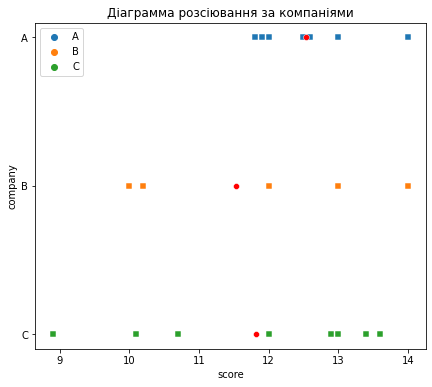

In [78]:
mean_points = data.groupby('company').mean()
x_sct = [float(mean_points.loc['A']), float(mean_points.loc['B']), float(mean_points.loc['C'])]
fig, ax = plt.subplots(figsize=(7,6))
sns.scatterplot(data=data, x='score', y='company', hue='company', marker="s").set_title("Діаграмма розсіювання за компаніями")
sns.scatterplot(x = x_sct, y = ['A', 'B', 'C'], color = 'red')
plt.show()

In [42]:
# compute overall mean
overall_mean = data['score'].mean()
print("Загальне середнє: ", overall_mean)
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
print("Загальна варіація всіх спостережень (SSt): ", ss_total)

Загальне середнє:  11.980952380952381
Загальна варіація всіх спостережень (SSt):  43.132380952380956


In [39]:
# compute group means
group_means = data.groupby('company').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean,overall_mean
company,,
A,12.542857,11.980952
B,11.533333,11.980952
C,11.825000,11.980952


In [40]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'company', right_index = True)

In [43]:
# compute Sum of Squares Within
ss_within = sum((data['score'] - data['group_mean'])**2)
print("Варіація спорстережень всередині груп (SSw):", ss_within)

Варіація спорстережень всередині груп (SSw): 39.52547619047619


In [45]:
# compute Sum of Squares Between
ss_between = sum((data['overall_mean'] - data['group_mean'])**2)
print("Варіація між группами (SSb): ", ss_between)

Варіація між группами (SSb):  3.6069047619047776


In [49]:
# compute Mean Square Within
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_within = n_obs - n_groups
ms_within = ss_within / df_within
print("Внутрішньогрупова дисперсія (MSw): ", ms_within)

Внутрішньогрупова дисперсія (MSw):  2.1958597883597886


In [51]:
# compute Mean Square Between
df_between = n_groups - 1
ms_between = ss_between / df_between
print("Міжгрупова дисперсія (MSb):", ms_between)

Міжгрупова дисперсія (MSb): 1.8034523809523888


In [52]:
# compute F-Value
f = ms_between / ms_within
print("Значення F-критерію: ", f)

Значення F-критерію:  0.8212966923081592


In [54]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_between, df_within)
print("p-знaчення: ", p_value)

p-знaчення:  0.4556832940515221


In [55]:
lm = ols('score ~ company',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq         F    PR(>F)
company    2.0   3.606905  1.803452  0.821297  0.455683
Residual  18.0  39.525476  2.195860       NaN       NaN


Наше значення р=0.45 перевищує 0.05, тому ми не можемо відхилити нульову гіпотезу. 
Незважаючи на те, що три способи вибірки різні, ми не маємо статистично значущої різниці.